# Week 8 Monday

## Rough plan for this week's classes

* Today: Decision trees
* Wednesday: Random forests

## [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning)

How human-being make classifications? Instead of using mathematical equations, we actually make a series of "decisions" based on the important features that are drawn from our past experience.

**Intuitions**: By repeatedly setting threshold for different features (multiple if-else conditions -- forming a flow-chart or decision tree structure), we can naturally achieve the classification task.


For the basic requirements, in this course we only ask you to call the package and understand how to interpret the results.

## Loading the iris dataset

The iris dataset (also available from Seaborn) is smaller than most of the datasets we work with in Math 10 (it only contains 150 rows/observations/data points).  But it is one of the most classic datasets in Machine Learning, so we should see it at some point.

In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
df = sns.load_dataset("iris")

This dataset is fairly similar to the penguins dataset, but with fewer rows and columns.  The penguins dataset has some missing data, but the iris dataset does not have any missing values.  Overall, the iris dataset is a little easier to analyze.

In [ ]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

Take a quick look at the data. 

In [ ]:
alt.Chart(df).mark_circle().encode(
    x = "petal_length",
    y = "petal_width",
    color = 'species:N',
    tooltip = ['petal_length','petal_width']
)

alt.Chart(...)

## Visualizing how a decision tree splits the data

Our goal is to divide the iris data by species.

* First we will divide by petal length.
* Then we will divide by petal width.
* Where would you make these divisions?

Guesses: petal length 2.5 and petal width 1.65 or 1.75.

(Be sure to look over the above chart and make sure you agree with these predictions.)

* How many "leaves" will the corresponding decision tree have?  (How many regions or cells does our domain get divided into?)

Three regions

## A Decision tree with two splits



* Create an instance of a `DecisionTreeClassifier` with `max_leaf_nodes` as above. Specify `random_state=2` (which will help me know that the first split happens on "petal_length"...
* Fit the classifier to the training data using `cols = ["petal_length", "petal_width"]` for the input features and using `"species"` for the target.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Notice that we are putting a (heavy) constraint on the decision tree, by only allowing it to have 3 regions (3 leaf nodes).  This will help reduce the potential for overfitting.

(Reminder: on Thursday last week, we saw two different pieces of evidence for overfitting.  One was just intuition: we had a very random-looking collection of data divided into four classes, and we achieved ~93% accuracy.  The other evidence was more precise: on the test set, which was not used when fitting the classifier, the accuracy dropped to ~29%.  In general, if you don't put a constraint on a decision tree, it is likely to overfit the data.)

We fit the classifier to the data, just like usual, by calling the `fit` method.

In [ ]:
cols = ["petal_length", "petal_width"]
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[cols], df["species"], test_size=0.2, random_state=1)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

* Illustrate the resulting tree using the following.
* Does it match what we expected from the Altair chart?

Don't bother trying to memorize this syntax (I don't have it memorized), but it's very important to be able to interpret the decision tree plot once you have it displayed.

```
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)
```

[Text(0.4, 0.8333333333333334, 'petal_length <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal_width <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

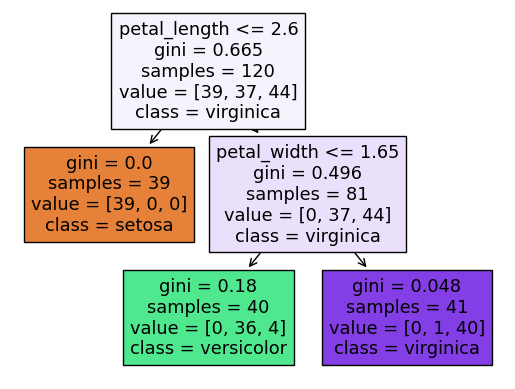

In [ ]:
plot_tree(clf, 
                feature_names=clf.feature_names_in_,
                class_names=clf.classes_,
                filled=True)

Nodes showing splits based on features, and branches representing the decision paths. The coloring (when filled=True) helps in understanding the class distributions at each node.

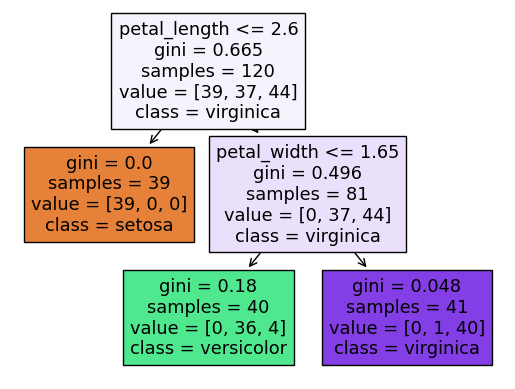

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

#underscore (_) for unwanted values

Gini score gives you an idea of how good a split is by showing the amount of class label mixing at that node. A lower Gini impurity is generally better.

Samples represent the number of samples (or instances) that reached the node.

Value shows the class distribution of the samples in that node.

In [ ]:
clf.score(X_test, y_test)

0.9666666666666667

* What is the depth of the corresponding tree?  We can answer by looking at the diagram, or by using the `get_depth` method.

Assuming we count the top row as row 0, then we see that the bottom row is row 2.  That is where the depth of `2` comes from.

In [ ]:
clf.get_depth()

2

* What is the theoretical maximum number of leaf nodes for a Decision Tree with depth $m$?

In the above picture, we only don't split the leaf at the left, because it already contains only irises from the setosa species, but theoretically we could split such a node in two, and then we would have four nodes on the bottom.  In general, if the depth is $m$, then the maximum number of leaf nodes is $2^m$.

## Predictions and predicted probabilities

* What species will be predicted for an iris with the following (physically impossible) values?
```
{"petal_length": 4, "petal_width": 3}
```

Here is one way to make a one-row DataFrame.  We pass to the constructor a length-one list with a dictionary in it.

In [ ]:
pd.DataFrame([ {"petal_length": 4, "petal_width": 3} ])

petal_length  petal_width
0             4            3

Here is another way to make a one-row DataFrame: we pass a dictionary to the constructor, with values length-one lists.  Notice that this creates the same DataFrame as the previous cell.

In [ ]:
df_fake = pd.DataFrame({"petal_length": [4], "petal_width": [3]})
df_fake

petal_length  petal_width
0             4            3

Here is a common warning if we input something without column names.

In [ ]:
clf.predict([[4, 3]])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

The warning goes away if we input a DataFrame with appropriate column names (meaning with the same column names as were used when we called `fit`.  Notice how we get the same prediction as in the previous cell.

In [ ]:
clf.predict(df_fake)

array(['virginica'], dtype=object)

* What are the corresponding predicted probabilities?

We can find this probability by calling the `predict_proba` method.  There are three numbers, corresponding to the probabilities of the three classes.

In [ ]:
clf.predict_proba(df_fake)

array([[0.        , 0.02439024, 0.97560976]])

Here are the corresponding classes.  Notice how the highest probability corresponds to *versicolor*, which was the prediction above.

In [ ]:
clf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

* Could you have predicted those probabilities from the visualization above?

Important: where does this probability come from?  If you look at the tree diagram above, you see that we start at the top and then move right (because $4 > 2.45$), and then move to the left (because $3 > 1.65$).  We wind up in a cell with `value = [0, 1, 40]`, which stands for 0 setosa, 1 versicolor, and 40 virginica.  

The probability of being versicolor then corresponds to 40/41.

In [ ]:
40/41

0.975609756097561

## The decision boundary for our decision tree

* Illustrate the decision boundary for our decision tree classifier using 5000 random values for the petal length and petal width.

Here we instantiate a random number generator.  This will only be used to generate (5000) random points for our chart, so there is no real advantage to using a `seed` value.  (We aren't using these values to produce any precise numbers.)

In [ ]:
import numpy as np
rng = np.random.default_rng()
# We want 5000 points, each with two features.
arr = rng.random(size = (5000,2))

We convert this NumPy array to a DataFrame, and name the columns.  (If we didn't name the columns, then when we call predict, we would have the same warning as we saw above.

In [ ]:
df2 = pd.DataFrame(arr, columns=cols)
df2.head(5)

petal_length  petal_width
0      0.108106     0.154910
1      0.306966     0.329880
2      0.170410     0.020553
3      0.966794     0.379437
4      0.278400     0.103418

I want these columns to have the same kind of range as in the original dataset.  They currently go from 0 to 1.  We multiply the "petal_length" column by 7.  (Be careful not to execute this cell more than once.) Similarly we multiply the petal width by 2.5.  

In [ ]:
df2["petal_length"] *= 7
df2["petal_width"] *= 2.5
# We now add a prediction column.  
#(This is the step which would raise a warning if we didn't have correct column names.)
df2['pred'] = clf.predict(df2[cols])


In [ ]:
df2.head(5)

petal_length  petal_width        pred
0      0.756739     0.387274      setosa
1      2.148765     0.824700      setosa
2      1.192868     0.051384      setosa
3      6.767558     0.948593  versicolor
4      1.948797     0.258545      setosa

Now we make the chart.  This shows a decision tree with three leaf nodes (three regions).  The decision boundaries are straight lines, like for logistic regression.  Moreover, these straight lines are always parallel to the coordinate axes.  So it might sound like decision trees are less flexible than logistic regression classifiers.  But in fact, decision trees are more prone to overfitting than logistic regression classifiers in general, because as the number of leaf nodes increases, the regions can get more and more complex/specialized.

It's worth staring at the following image, together with the illustrated decision tree above (the one produced by `plot_tree`), and seeing how they compare.  For example, do you see why the boundary line at petal width 1.65 only goes to the right?  (Why doesn't it continue all the way to the left of petal length 2.6, in terms of the above visualization of the decision tree?)

In [ ]:
alt.Chart(df2).mark_circle().encode(
    x = "petal_length",
    y = "petal_width",
    color = 'pred'
)

alt.Chart(...)

### Bias-Variance Tradeoff in DT:
The parameter tree depth is important to determine the final performance of classification, which can be understood as control the complexity of algorithm.
- deep tree: increase complexity, low bias, large variance
- shallow tree: decrease complexity, high bias, low variance

Typically, decision tree tends to have large depth, making it prune to over-fitting (it just means the model is too complicated for the data, and the variance is too large, therefore causing the large error in testdataset).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6326ae33-90c3-4a17-a575-e420ca7d06c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>